<a href="https://colab.research.google.com/github/yuval728/MLOA/blob/main/MLOAExp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

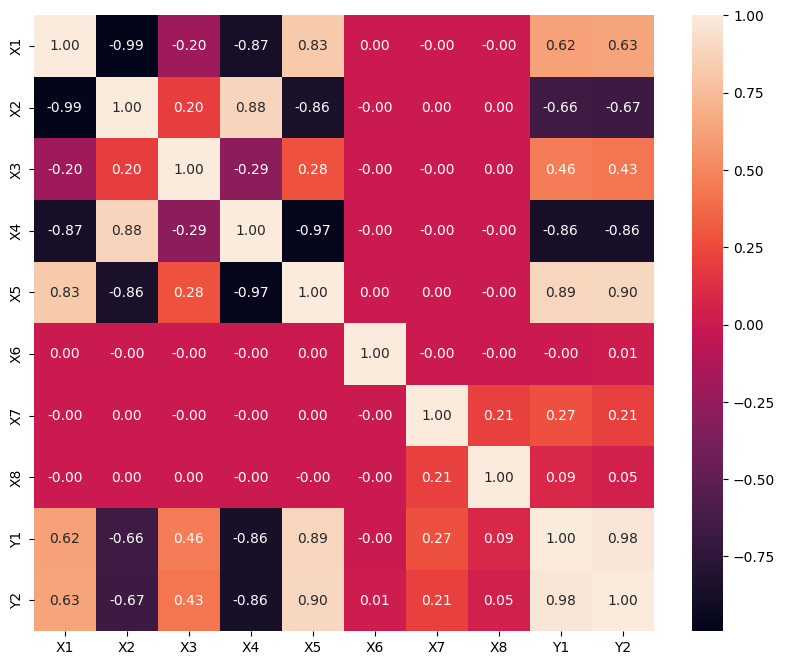

In [ ]:

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [ ]:
X=df.iloc[:,:-2]
y=df.iloc[:,-2:]

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
def evaluate(model):
  preds=model.predict(x_test)
  print("testing error:")
  print(metrics.mean_squared_error(y_test,preds))
  print("training error:")
  tpreds=model.predict(x_train)
  print(metrics.mean_squared_error(y_train,tpreds))
  plt.scatter(y_train.iloc[:,0], tpreds[:,0])
  plt.xlabel("True Y1")
  plt.ylabel("Predicted Y1")
  plt.title("Scatter plot of True Y1 vs Predicted Y1 (Training)")
  z1 = np.polyfit(y_train.iloc[:,0], tpreds[:,0], 1)
  p1 = np.poly1d(z1)
  plt.plot(y_train.iloc[:,0], p1(y_train.iloc[:,0]), color='red')
  plt.show()

  plt.scatter(y_train.iloc[:,1], tpreds[:,1])
  plt.xlabel("True Y2")
  plt.ylabel("Predicted Y2")
  plt.title("Scatter plot of True Y2 vs Predicted Y2 (Training)")
  z2 = np.polyfit(y_train.iloc[:,1], tpreds[:,1], 1)
  p2 = np.poly1d(z2)
  plt.plot(y_train.iloc[:,1], p2(y_train.iloc[:,1]), color='red')
  plt.show()

testing error:
9.999378008690954
training error:
9.752757722014454


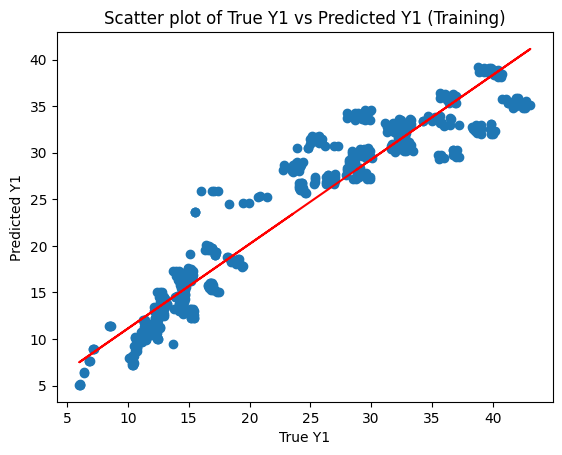

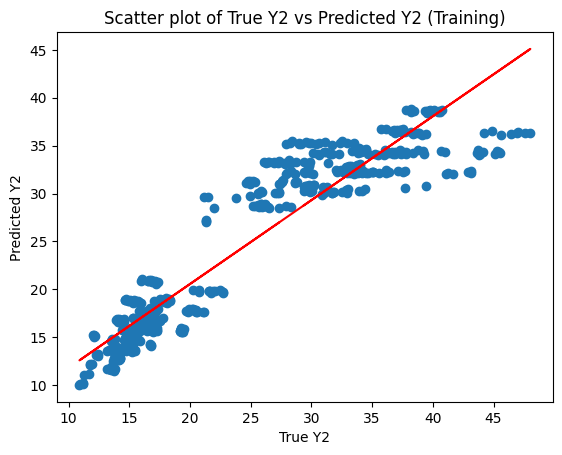

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

ridge=MultiOutputRegressor(Ridge(random_state=42))
ridge.fit(x_train,y_train)
evaluate(ridge)

testing error:
21.28577584892339
training error:
20.51505933870393


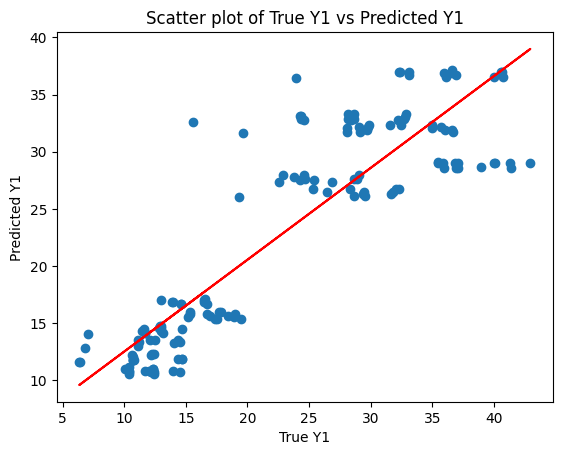

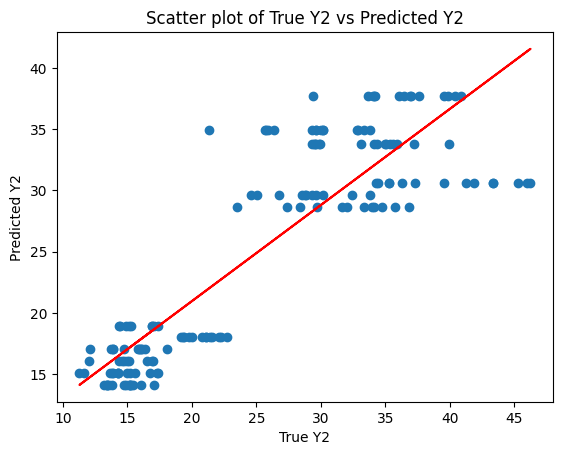

In [ ]:
from sklearn.linear_model import  Lasso
from sklearn.multioutput import MultiOutputRegressor

lasso=MultiOutputRegressor(Lasso(random_state=42))
lasso.fit(x_train,y_train)
evaluate(lasso)

testing error:
9.52388228812617
training error:
9.303131064650135


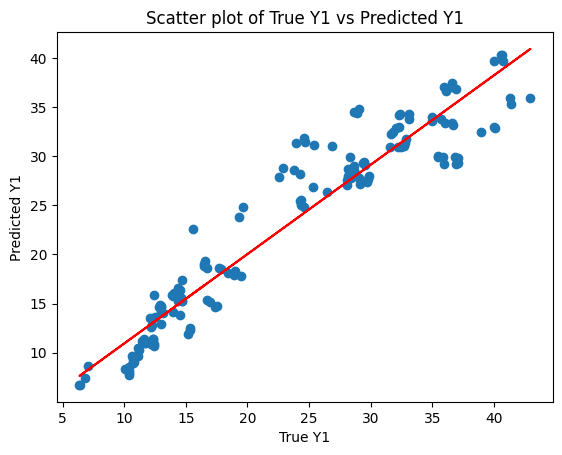

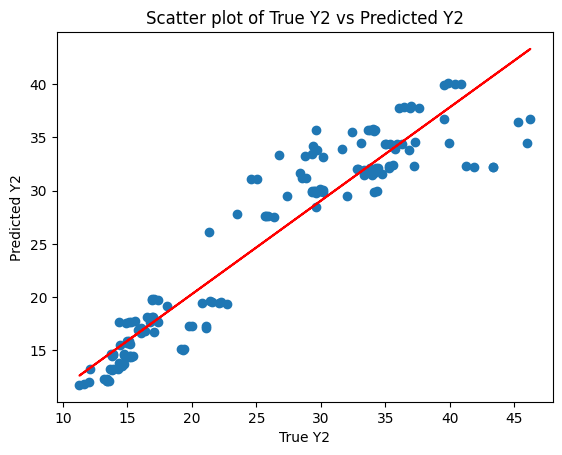

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

lr=MultiOutputRegressor(LinearRegression())
lr.fit(x_train,y_train)
evaluate(lr)